<a href="https://colab.research.google.com/github/aditis1204/CNN-On-MNIST-and-CIFAR-10-Dataset/blob/master/CIFAR_10_Dataset_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
x_train[0].shape

(32, 32, 3)

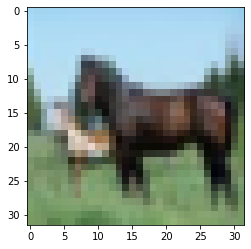

In [0]:
plt.imshow(x_train[12])

In [0]:
x_train = x_train/255

In [0]:
x_test = x_test/255

In [0]:
x_test.shape

(10000, 32, 32, 3)

In [0]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [0]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))

#output layer softmax ---> Multi Class

model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics = ['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss',patience=2)
model.fit(x_train,y_cat_train,epochs=15,validation_data = (x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5090 - accuracy: 0.4540 - val_loss: 1.3230 - val_accuracy: 0.5229
Epoch 2/15
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1836 - accuracy: 0.5822 - val_loss: 1.1387 - val_accuracy: 0.5982
Epoch 3/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0461 - accuracy: 0.6347 - val_loss: 1.0654 - val_accuracy: 0.6210
Epoch 4/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9430 - accuracy: 0.6719 - val_loss: 1.0530 - val_accuracy: 0.6343
Epoch 5/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8652 - accuracy: 0.6989 - val_loss: 0.9632 - val_accuracy: 0.6649
Epoch 6/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7908 - accuracy: 0.7237 - val_loss: 0.9688 - val_accuracy: 0.6674
Epoch 7/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7271 - accuracy: 0.7460 - val_loss: 0.9760 -

In [0]:
metrics = pd.DataFrame(model.history.history)

In [0]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.509033,0.45400,1.322981,0.5229
1,1.183644,0.58220,1.138676,0.5982
2,1.046071,0.63468,1.065435,0.6210
3,0.943008,0.67192,1.053012,0.6343
4,0.865153,0.69894,0.963158,0.6649
5,0.790755,0.72366,0.968845,0.6674
6,0.727082,0.74596,0.976042,0.6772


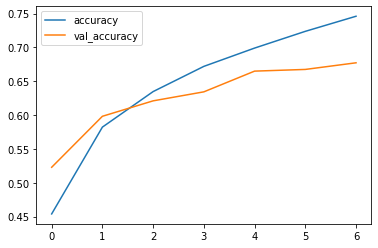

In [0]:
metrics[['accuracy','val_accuracy']].plot()

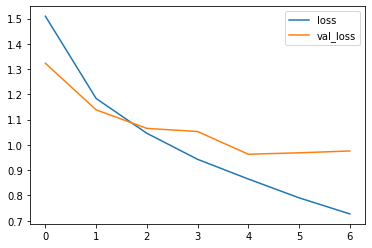

In [0]:

metrics[['loss','val_loss']].plot()

In [0]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9760423302650452, 0.6772000193595886]

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1000
           1       0.79      0.79      0.79      1000
           2       0.65      0.53      0.58      1000
           3       0.54      0.37      0.44      1000
           4       0.64      0.62      0.63      1000
           5       0.63      0.53      0.58      1000
           6       0.65      0.82      0.73      1000
           7       0.74      0.75      0.74      1000
           8       0.74      0.82      0.78      1000
           9       0.67      0.82      0.74      1000

    accuracy                           0.68     10000
   macro avg    

In [0]:
confusion_matrix(y_test,predictions)

array([[741,  26,  30,  16,  14,   6,  12,   7, 107,  41],
       [ 29, 786,   4,   3,   2,   3,  23,   0,  47, 103],
       [108,  11, 525,  43,  93,  61,  88,  30,  15,  26],
       [ 39,  28,  62, 367,  84, 148, 134,  49,  32,  57],
       [ 37,   8,  66,  42, 622,  25,  84,  82,  15,  19],
       [ 22,  11,  46, 125,  73, 530,  68,  74,  15,  36],
       [ 13,   7,  36,  36,  35,  14, 818,   7,  13,  21],
       [ 27,  12,  20,  34,  46,  39,  15, 747,   7,  53],
       [ 77,  29,  10,   8,   6,   5,   3,   4, 819,  39],
       [ 29,  76,   9,   7,   2,   5,  10,  10,  35, 817]])

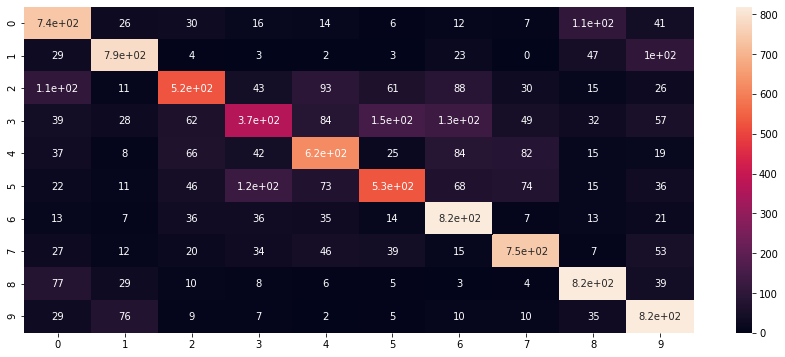

In [0]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [0]:
my_image = x_test[2]

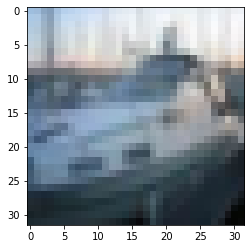

In [0]:

plt.imshow(my_image)

In [0]:
y_test[2]

array([8], dtype=uint8)

In [0]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([8])